In [1]:
import numpy as np
import plotly.graph_objects as go

In [2]:
def visualize_point_cloud(pc):
	fig = go.Figure(data=[go.Scatter3d(
	    x=pc[:, 0],
	    y=pc[:, 1],
	    z=pc[:, 2],
	    mode='markers',
	    marker=dict(
	        size=2,
	        #color=samples[i][:, 2],  # color points by z-axis value
	        #colorscale='Viridis',
	        opacity=0.8
	    )
	)])
	
	fig.update_layout(scene=dict(
	    xaxis_title='X',
	    yaxis_title='Y',
	    zaxis_title='Z'
	))
	
	fig.show()

In [3]:
pc = np.load('../../PVD/data/ShapeNetCore.v2.PC15k/02691156/train/1a04e3eab45ca15dd86060f189eb133.npy')
visualize_point_cloud(pc)

In [4]:
def normalize_point_cloud(pc):
    x, y, z = pc[:, 0], pc[:, 1], pc[:, 2]
    x = (x - np.min(x)) / (np.max(x) - np.min(x)) * 2 - 1
    y = (y - np.min(y)) / (np.max(y) - np.min(y)) * 2 - 1
    z = (z - np.min(z)) / (np.max(z) - np.min(z)) * 2 - 1

    return np.stack([x, y, z], axis=1)

visualize_point_cloud(normalize_point_cloud(pc))

In [6]:
def convert_to_spherical_coordinates(pc):
    out = np.zeros_like(pc)
    x, y, z = pc[:, 0], pc[:, 1], pc[:, 2]

    out[:,0] = np.sqrt(x**2 + y**2 + z**2)
    r = np.sqrt(x**2 + y**2)
    out[:,1]= np.arccos(z / r)
    out[:,2]= np.arctan2(y, x)
    
    return out

spherical_pc = convert_to_spherical_coordinates(pc)

/tmp/ipykernel_32938/3541280619.py:7: RuntimeWarning:

invalid value encountered in arccos



In [7]:
# Plot the unit sphere
fig = go.Figure()

# Plot the first component (radius) of spherical_pc
fig.add_trace(go.Scatter3d(
    x=np.sin(spherical_pc[:, 1]) * np.cos(spherical_pc[:, 2]),
    y=np.sin(spherical_pc[:, 1]) * np.sin(spherical_pc[:, 2]),
    z=np.cos(spherical_pc[:, 1]),
    mode='markers',
    marker=dict(
        size=2,
        color=spherical_pc[:, 0] / np.max(spherical_pc[:, 0]),  # normalize radius values between 0 and 1
        colorscale='Viridis',
        opacity=0.8
    )
))

# Set the layout
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))

# Show the plot
fig.show()


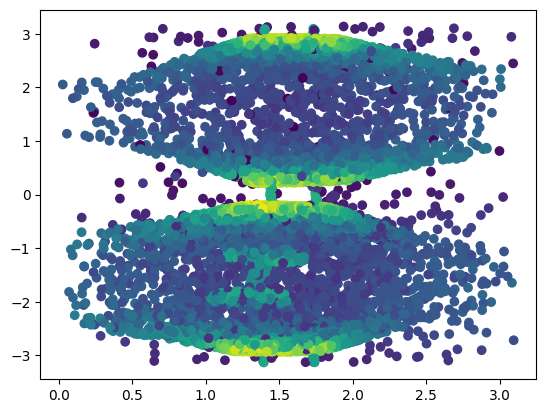

In [8]:
import matplotlib.pyplot as plt

plt.scatter(spherical_pc[:, 1], spherical_pc[:, 2], c=spherical_pc[:, 0], cmap='viridis')

In [85]:
x = np.array([[0, 1, 0], [0, 1, 1]])
y = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

y_prime = y[:, 2, np.newaxis]
print(x[:, 2], y_prime)
x[:, 2]-y_prime

[0 1] [[3]
 [6]
 [9]]


array([[-3, -2],
       [-6, -5],
       [-9, -8]])

In [97]:
def spherical_distance(p1, p2):
    sin_p1_theta = np.sin(p1[:, 1])
    sin_p2_theta = np.sin(p2[:, 1])
    cos_p1_theta = np.cos(p1[:, 1])
    cos_p2_theta = np.cos(p2[:, 1])
    cos_p1_phi_minus_p2_phi = np.cos(p1[:, 2] - p2[:, 2, np.newaxis])
    
    print(sin_p1_theta.shape, sin_p2_theta.shape, cos_p1_theta.shape, cos_p2_theta.shape, cos_p1_phi_minus_p2_phi.shape)
    out = sin_p1_theta[:, np.newaxis] * sin_p2_theta
    print(out.shape)
    print(cos_p1_phi_minus_p2_phi.shape)
    out *= cos_p1_phi_minus_p2_phi
    out += cos_p1_theta * cos_p2_theta

k = 10
sd_knn = 0.1

p1 = np.array([[0, 1, 0], [0, 1, 1]])
dist = spherical_distance(p1, spherical_pc)
ind = np.argpartition(dist, k)[:k]
dist = dist[ind]
points = pc[ind]

w_prime = np.exp(-dist**2 / 0.1)
w = w_prime / np.sum(w_prime)

print(np.sum(w*points[:, 0]))

p1[0] = np.sum(w * points[:, 0])

p1[0]

(2,) (15000,) (2,) (15000,) (15000, 2)
(2, 15000)
(15000, 2)


ValueError: operands could not be broadcast together with shapes (2,15000) (15000,2) (2,15000) 